# Creating your own dataframe

This notebook will walk you through the basics of creating a pandas dataframe. You'll use the data you collected in the distance vs brightness lab.

First, let's import the pandas and matplotlib:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Next, create 6 lists: 3 that contain your distance measurements from each experimental run and 3 that contain your brightness measurements from each experimental run.

In [2]:
# Fill in the lists below
dist1 = [0, 10, 20, 30, 40 , 50, 60, 70, 80, 90, 100]
dist2 = [0, 10, 20, 30, 40 , 50, 60, 70, 80, 90, 100]
dist3 = [0, 10, 20, 30, 40 , 50, 60, 70, 80, 90, 100]
brt1 = [18357, 3043, 821, 387, 193, 97, 47, 47, 47, 47, 47]
brt2 = [18307, 3670, 964, 387, 193, 97, 47, 47, 47, 47, 47]
brt3 = [17100, 3333, 868, 337, 193, 97, 47, 47, 47, 47, 47]

Now we'll create a dataframe based on these lists using the pandas .DataFrame() function.

In [3]:
df = pd.DataFrame({"distance 1": dist1, "distance 2": dist2, "distance 3": dist3, 
                   "brightness 1": brt1, "brightness 2": brt2, "brightness 3": brt3})

# See those {curly brackets}? This means we're using a special data type called a dictionary!

Look at the first 5 lines of our dataframe using the .head() function

In [4]:
df.head()

,distance 1,distance 2,distance 3,brightness 1,brightness 2,brightness 3
0,0,0,0,18357,18307,17100
1,10,10,10,3043,3670,3333
2,20,20,20,821,964,868
3,30,30,30,387,387,337
4,40,40,40,193,193,193


Notice that the strings we chose in the .DataFrame() function have become the column headers and the items from the lists are the column values. 

What order are the columns in?

## Pandas review: Dataframe columns

Select just the "brightness 1" column and assign it to a variable.

In [5]:
brt1 = df["distance 1"]

Use the .head() function to look at the first 10 values in this column.

In [6]:
brt1.head(11)

0       0
1      10
2      20
3      30
4      40
5      50
6      60
7      70
8      80
9      90
10    100
Name: distance 1, dtype: int64

Print out the min, max, and average value in this column:

In [7]:
# You may have used numpy functions for these calculations in the past, but have you tried pandas methods?
# Check your cheat sheet for details
print(brt1.mean())
print(brt1.max())
print(brt1.min())


50.0
100
0


Use the .count() method to find out how many values are in the first brightness column:

In [8]:
brt1.count()

11

Now use the .sum() method to find the sum of all the values in this column:

In [9]:
brt1.sum()

550

## Adding to a dataframe

You have three columns for brightness and three columns for distance, but we're interested in the average for each.

We can add a new column to our dataframe that contains the average brightness value like this:

In [10]:
df["avg brightness"] = df[["brightness 1", "brightness 2", "brightness 3"]].mean(axis=1)

# Notes:
# "avg brightness" is the name of the new column
# We are specifying which columns to average together using an index in brackets
# We're using the pandas .mean() method again!
# axis=1 specifies that pandas should find the mean across columns. 
# (axis=0 would tell pandas to find the mean across rows)

df.head(5)

,distance 1,distance 2,distance 3,brightness 1,brightness 2,brightness 3,avg brightness
0,0,0,0,18357,18307,17100,17921.333333
1,10,10,10,3043,3670,3333,3348.666667
2,20,20,20,821,964,868,884.333333
3,30,30,30,387,387,337,370.333333
4,40,40,40,193,193,193,193.000000


Assign the "avg brightness" column to a new variable:

In [11]:
avgbrt = df["avg brightness"]

What is the data type of the "avg brightness" column? (Hint: use the .dtypes method)

In [12]:
avgbrt.dtypes

dtype('float64')

Let's compare this to the rest of the columns. (Hint: try running the .dtypes method on the whole dataframe)

In [13]:
brt1.dtypes

dtype('int64')

Your turn! Create another column called "avg distance" that contains the average distance for each step in the experiment.

In [14]:
df["avg distance"] = df[["distance 1", "distance 2", "distance 3"]].mean(axis=1)
df.head(5)

,distance 1,distance 2,distance 3,brightness 1,brightness 2,brightness 3,avg brightness,avg distance
0,0,0,0,18357,18307,17100,17921.333333,0.0
1,10,10,10,3043,3670,3333,3348.666667,10.0
2,20,20,20,821,964,868,884.333333,20.0
3,30,30,30,387,387,337,370.333333,30.0
4,40,40,40,193,193,193,193.000000,40.0


Assign your new column to a variable and print out the first 10 values:

In [15]:
avgd = df["avg distance"]

## Sorting Dataframes

Now let's do some more data analysis using pandas. We can use the .sort_values() function to sort our data by average brightness.

In [16]:
df_sorted = df.sort_values(["avg brightness"]) # specify the column that you want to use for the sort using an index
# Note that we need to assign the sorted dataframe to a new variable

df_sorted.head(10) # Look at the first 10 lines of the sorted file

,distance 1,distance 2,distance 3,brightness 1,brightness 2,brightness 3,avg brightness,avg distance
6,60,60,60,47,47,47,47.000000,60.0
7,70,70,70,47,47,47,47.000000,70.0
8,80,80,80,47,47,47,47.000000,80.0
9,90,90,90,47,47,47,47.000000,90.0
10,100,100,100,47,47,47,47.000000,100.0
5,50,50,50,97,97,97,97.000000,50.0
4,40,40,40,193,193,193,193.000000,40.0
3,30,30,30,387,387,337,370.333333,30.0
2,20,20,20,821,964,868,884.333333,20.0
1,10,10,10,3043,3670,3333,3348.666667,10.0


Look at the distances in this sorted dataframe. Do the lowest brightness values occur at large or small distances?

What if we want to look at the highest brightness values? We can sort the data in reverse by adding another argument to the sort_values() function.

In [17]:
# set the ascending argument to False to sort values from highest to lowest
df_sorted = df.sort_values(["avg brightness"], ascending = False)
# We will overwrite our original variable, but you could use a different variable here if you wanted
# to store multiple sorted dataframes

df_sorted.head(10)

,distance 1,distance 2,distance 3,brightness 1,brightness 2,brightness 3,avg brightness,avg distance
0,0,0,0,18357,18307,17100,17921.333333,0.0
1,10,10,10,3043,3670,3333,3348.666667,10.0
2,20,20,20,821,964,868,884.333333,20.0
3,30,30,30,387,387,337,370.333333,30.0
4,40,40,40,193,193,193,193.000000,40.0
5,50,50,50,97,97,97,97.000000,50.0
6,60,60,60,47,47,47,47.000000,60.0
7,70,70,70,47,47,47,47.000000,70.0
8,80,80,80,47,47,47,47.000000,80.0
9,90,90,90,47,47,47,47.000000,90.0


Are the distances associated with the largest brightness values large or small?

Try it yourself! Sort the dataframe by average distance (low to high) and look at the first 10 rows:

In [18]:
df_sorted = df.sort_values(["avg brightness"], ascending = True)
df_sorted.head(10)

,distance 1,distance 2,distance 3,brightness 1,brightness 2,brightness 3,avg brightness,avg distance
6,60,60,60,47,47,47,47.000000,60.0
7,70,70,70,47,47,47,47.000000,70.0
8,80,80,80,47,47,47,47.000000,80.0
9,90,90,90,47,47,47,47.000000,90.0
10,100,100,100,47,47,47,47.000000,100.0
5,50,50,50,97,97,97,97.000000,50.0
4,40,40,40,193,193,193,193.000000,40.0
3,30,30,30,387,387,337,370.333333,30.0
2,20,20,20,821,964,868,884.333333,20.0
1,10,10,10,3043,3670,3333,3348.666667,10.0


## Saving a dataframe as a csv file

You can export your dataframe to your computer as a csv using the .to_csv() function.

In [19]:
df.to_csv("lab_averages.csv", index=False) # index=False removes the index column (1, 2, 3...) from our dataset

## Graphing our results

Use matplotlib to graph your results. Try plt.scatter() and plt.plot(). What are the strengths and weaknesses of each type of graph?

Text(0.5,1,'Average Distance v Average Brightness')

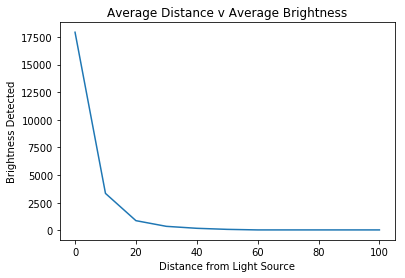

In [20]:
# Note: try experimenting with the marker argument for your graphs
plt.plot(avgd, avgbrt)
#plt.xlim(0, 100)
#plt.ylim(0, 17500)
plt.xlabel("Distance from Light Source")
plt.ylabel("Brightness Detected")
plt.title("Average Distance v Average Brightness")

